<h1>ITNPDB2 Representing and Manipulating Data</h1>
<h3>University of Stirling<br>Dr. Saemundur Haraldsson</h3>
<h2>Text processing</h2>
<h4>        
    <ul>
        <li>Natural language processing</li>
        <ul>
            <li>
                Lexical analysis (Tokenization)
            </li>
            <li>Natural Language Toolkit <a href="http://www.nltk.org/book/">(Useful book)</a><br>
                Vader -- sentiment analysis
            </li>
        </ul>
    </ul>
</h4>

## Lexical analysis or Tokenization
### is the process of converting a string or text into tokens <br> Paragraphs -> Sentences -> Clauses  -> Words

#### Depending on the purpose we include/exclude:   
    - punctuations (. , ; : )
    - white space
    - others


In [19]:
# We read in the whole document
with open('for_lexical.txt','r') as fid:
    text = fid.read()
print(text)

# Paragraphs (in our text) will be delimited by 2 newline characters
- This usually has to be checked manually

In [20]:
paragraphs = text.split('\n\n')
display(paragraphs)

['']

## We notice that there are a lot of extra newline characters \n in each paragraph <br> we don't need them
- We'll use __replace__ to exclude them from our tokens 

In [21]:
paragraphs = [i.replace('\n',' ') for i in paragraphs]
display(paragraphs)

['']

## Sentences are usually delimited by full stops
- and as sentences are a smaller entity than paragraphs we can work from there
- watch out though, splitting each paragrap gives us a separate list. We'll use list comprehension to flatten the resulting list of lists

In [22]:
sentences = [i for j in paragraphs for i in j.split('.')]
display(sentences)

['']

## Sentences are made up of clauses
- There are a number of grammatical rules to define a clause but we'er going to simplify it a bit for this exercise
- Let's define a clause as anything that comes before or after the following conjunctions:
 - __and__
 - __or__
 - __but__
 - __nor__

### Working onwards from sentences we split each into clauses
- __Not grammatically correct__ as we're not concerned with that at the moment
- __split__ only takes one argument but we want to split on any occurance of our conjunctions which are many
- we can iterate through the sentences and make an overly complicated __if then else__ script
- or we can use __re__, python's regular expression package
- we still use list comprehension 

In [23]:
import re
clauses = [i for j in sentences for i in re.split(r' and | or | but | nor ',j)]
# This is very simplified regular expression
display(clauses)

['']

## And lastly we want the words
- we could split the entire text on white spaces as in __text.split(' ')__
 - That would give us everything but the white spaces, i.e. leaves in the punctuation
- Simplest way is to use __re.split()__ and split on words 
    - __\W__ is a predifined special sequence for any character that is not a word character
    - __\s__ is white space
    - __re.split()__ will __not__ treat consecutive separators as a single one

In [24]:
words = re.split(r'\W\s*|\s',text) # This will also split hyphenated words and words with Apostrophes
display(words)

['']

## Now what to do with these tokens?
### We can count the number of unique tokens in each token class

In [25]:
print("Number of paragraphs is {}, thereof unique {}".format(len(paragraphs),len(set(paragraphs))))
print("Number of sentences is {}, thereof unique {}".format(len(sentences),len(set(sentences))))
print("Number of clauses is {}, thereof unique {}".format(len(clauses),len(set(clauses))))
print("Number of words is {}, thereof unique {}".format(len(words),len(set(words))))

Number of paragraphs is 1, thereof unique 1
Number of sentences is 1, thereof unique 1
Number of clauses is 1, thereof unique 1
Number of words is 1, thereof unique 1


### Let's count occurrences of each word

In [26]:
# We save it in a list of tuples
word_count = [(word,words.count(word)) for word in set(words)]
display(word_count)

[('', 1)]

### Let's see a few of the most frequent words
- couple of things happening in the following line
- but only in a single function call
 - we're using the __key__ and __reverse__ keyword arguments for sorted
 - and only displaying the first 15 

In [27]:
display(sorted(word_count,key=lambda x:x[1],reverse=True)[:15])

[('', 1)]

<h2>
    Tokenization is sometimes a preprocess for plagiarism detection.<br>
    Words as tokens would not be very useful for that task.<br>
    Clauses, sentences, and paragraphs are rather language specific ways.
</h2>

### A really simple* plagiarism technique would be to split into overlapping set lenght "word windows"
- Let's try it out with every pairs of 7 words.
- We don't need white space characters so we'll use the word list which is in the correct order already
 - but we need to clean it a bit first
 - there are some whitespaces.
 - we also know that any single instance of __s__ should be part of the word before (right?)
 - can you think of any other obvious things we should look out for as well?
- We could use functions and tools from __itertools__ https://docs.python.org/3.7/library/itertools.html
- Or we can make our own one-liner

*This is far from state-of-the-art, actually would probably not really work in praxis

In [28]:
# cleans out whitespaces:
clean_words = [i.strip() for i in words if len(i.strip())>0] 
# find the single s character:
ind_of_s = [ind for ind,w in enumerate(clean_words) if w=='s'] 
# Add the apostrophe and s:
clean_words = [word+"´s" if ind+1 in ind_of_s else word for ind,word in enumerate(clean_words) ] 
ind_of_s.reverse() # Why do you think we're reversing the index list?
# Remove the single s characters:
for ind in ind_of_s: 
    del(clean_words[ind])

# Now we'll make our list of 7-grams from the cleaned list of words:
seven_grams = [' '.join(clean_words[i:i+6]) for i in range(len(clean_words) - (6))]
display(seven_grams)

[]

# NLTK
## Natural Language Toolkit
- There's a package for what we were doing
- __and so much more__

In [31]:
# First some imports that we'll need
import nltk
import matplotlib
import matplotlib.pyplot as plt

## Tokenization

In [32]:
display(nltk.tokenize.sent_tokenize(text)) # sentence tokens
display(nltk.word_tokenize(text)) # word/type tokens, includes punctuation

[]

[]

## Let's load some data that is more interesting than we had before

In [33]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


## The previous cell loaded a bunch of books into memory as NLTK text objects
- They provide some interesting methods 
- Let's explore it a bit

## We can do a simple wordcount

In [34]:
display(len(text2))
display(len(set(text2)))
display(len(text2)/len(set(text2))) # Lexical diversity

141576

6833

20.719449729255086

In [35]:
display(text1) # What is in text1?
display(dir(text1)) # What attributes can we see?

<Text: Moby Dick by Herman Melville 1851>

['_CONTEXT_RE',
 '_COPY_TOKENS',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_context',
 '_train_default_ngram_lm',
 'collocation_list',
 'collocations',
 'common_contexts',
 'concordance',
 'concordance_list',
 'count',
 'dispersion_plot',
 'findall',
 'generate',
 'index',
 'name',
 'plot',
 'readability',
 'similar',
 'tokens',
 'unicode_repr',
 'vocab']

## We can search for words and their context

In [36]:
text2.concordance('honour')

Displaying 18 of 18 matches:
ce he hoped she would allow him the honour of calling tomorrow to enquire afte
o enquire after Miss Dashwood . The honour was readily granted , and he then d
pect . But why ? Is he not a man of honour and feeling ? Has there been any in
culties would have been more to his honour I think , as well as more consisten
" My dear Mrs . Palmer !" " Upon my honour I did .-- I met Colonel Brandon Mon
ous lucky girl to get him , upon my honour ; not but that he is much more luck
with revived security of Edward ' s honour and love , and her companion ' s fa
to act by her as every principle of honour and honesty directed , to combat he
 with calmness . " I did myself the honour of calling in Berkeley Street last 
 DEAR MADAM , " I have just had the honour of receiving your letter , for whic
aying to you ; for though , upon my honour , I TRIED to keep out of hearing , 
rupling to engage my faith where my honour was already bound . The event has p
The attachment , from w

## Search for words in similar context

In [37]:
text2.similar('honour')

heart fortune mother disposition satisfaction consequence life
attention comfort pleasure affection hope living illness time conduct
mind kindness fancy sight


## List the similar contexts of two words

In [38]:
text2.common_contexts(['very','monstrous'])

is_pretty a_pretty be_glad am_glad a_lucky


## Visualise where words appears

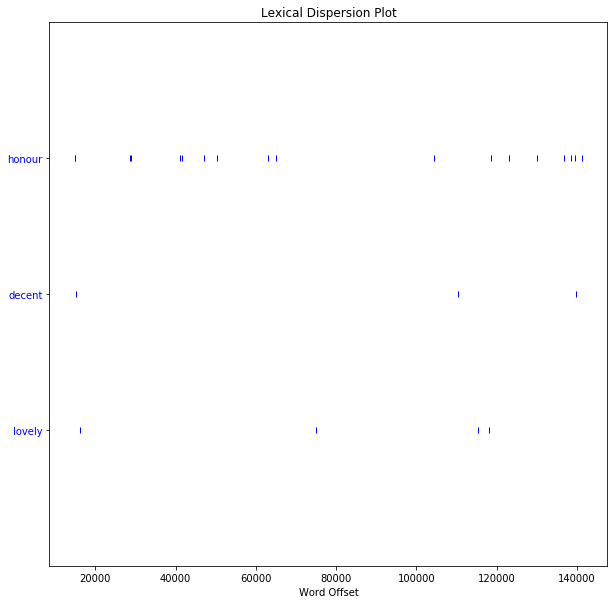

In [39]:
fig = plt.figure(figsize=(10,10))
text2.dispersion_plot(['honour','decent','lovely'])

## Frequency distribution of the 50 most frequent tokens
FreqDist() is part of the nltk.book module

[(',', 9397),
 ('to', 4063),
 ('.', 3975),
 ('the', 3861),
 ('of', 3565),
 ('and', 3350),
 ('her', 2436),
 ('a', 2043),
 ('I', 2004),
 ('in', 1904),
 ('was', 1846),
 ('it', 1568),
 ('"', 1506),
 (';', 1419),
 ('she', 1333),
 ('be', 1305),
 ('that', 1297),
 ('for', 1234),
 ('not', 1212),
 ('as', 1179),
 ('you', 1037),
 ('with', 971),
 ('had', 969),
 ('his', 941),
 ('he', 895),
 ("'", 883),
 ('have', 807),
 ('at', 806),
 ('by', 737),
 ('is', 728),
 ('."', 721),
 ('s', 700),
 ('Elinor', 684),
 ('on', 676),
 ('all', 642),
 ('him', 633),
 ('so', 617),
 ('but', 597),
 ('which', 592),
 ('could', 568),
 ('Marianne', 566),
 ('my', 551),
 ('Mrs', 530),
 ('from', 527),
 ('would', 507),
 ('very', 492),
 ('no', 488),
 ('their', 463),
 ('them', 462),
 ('--', 461)]

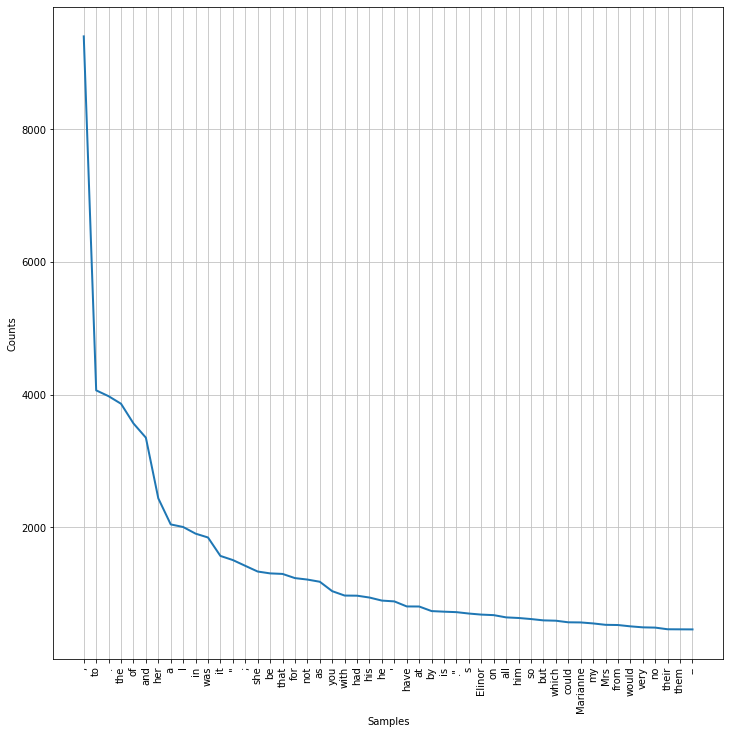

In [40]:
fdist = FreqDist(text2)
vocabulary = sorted(list(fdist.items()),key=lambda x:x[1],reverse=True)
display(vocabulary[:50])
plt.figure(figsize=(12,12))
fdist.plot(50)

## That wouldn't tell us much about the text, what about the most infrequent words?
- Those that only occur once
- __hapaxes__

In [41]:
# How many are they?
len(fdist.hapaxes())

2694

## Okay, that's a bit too many rare words to tell us anything of importance
## Let's try something else
- Do you know what we're doing here?

In [42]:
interesting_words = sorted([w for w in set(text2) if len(w) > 11 and fdist[w] > 7])
display(interesting_words)

['Somersetshire',
 'acknowledged',
 'acquaintance',
 'affectionate',
 'astonishment',
 'cheerfulness',
 'circumstance',
 'circumstances',
 'commendation',
 'communication',
 'consciousness',
 'considerable',
 'consideration',
 'conversation',
 'difficulties',
 'disappointed',
 'disappointment',
 'embarrassment',
 'encouragement',
 'endeavouring',
 'extraordinary',
 'inconvenience',
 'indifference',
 'intelligence',
 'neighbourhood',
 'particularly',
 'recollection',
 'satisfaction',
 'uncomfortable',
 'understanding',
 'unfortunately']

## Let's visualise where the words found above are in the text

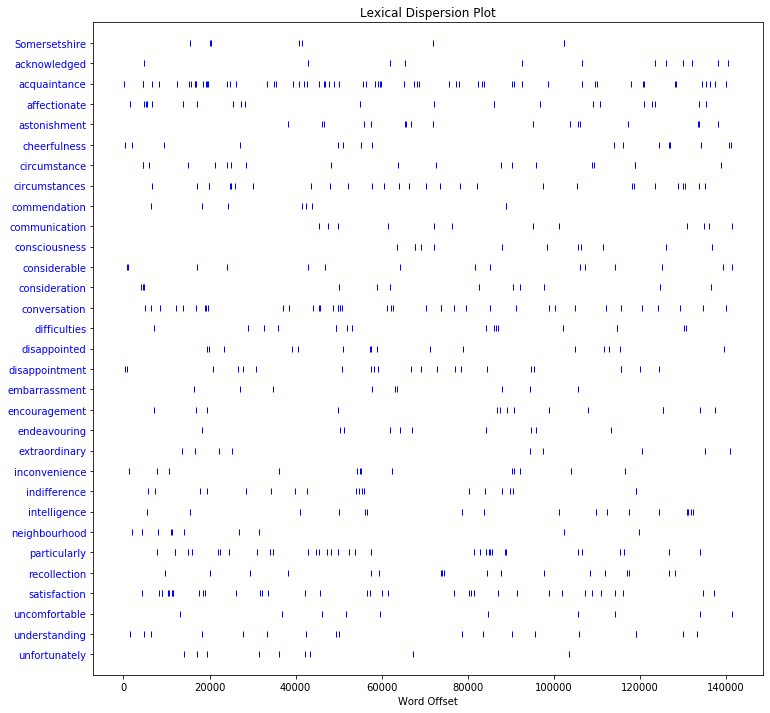

In [43]:
plt.figure(figsize=(12,12))
text2.dispersion_plot(interesting_words)

## We can also see commonly co-occurring words

In [44]:
text2.collocations(num=20,window_size=2)

ValueError: too many values to unpack (expected 2)

# Sentiment analysis using VADER
- Attempts to extract opinions or "feelings" from text

In [45]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

## Polarity scores estimate the sentiment of text
- __neg__: Negative sentiment between 0 and 1
- __pos__: Positive sentiment between 0 and 1
- __neu__: Neutral sentiment between 0 and 1
- __compound__: Normalised sum of the three above between -1 and 1

In [46]:
score = analyser.polarity_scores("This is an awful sentence that I've written.")
display(score)

{'neg': 0.291, 'neu': 0.583, 'pos': 0.126, 'compound': -0.4019}

## Let's check the sentiment for the first 100 sentences of book 2

In [47]:
text2_sentences = nltk.sent_tokenize(' '.join(text2))
score = analyser.polarity_scores(' '.join(text2_sentences[:100]))
display(score)

{'neg': 0.076, 'neu': 0.747, 'pos': 0.177, 'compound': 0.9998}

In [48]:
len(text2_sentences)

5540

## Can we plot how the sentiment evolves per sentence throughout the book?

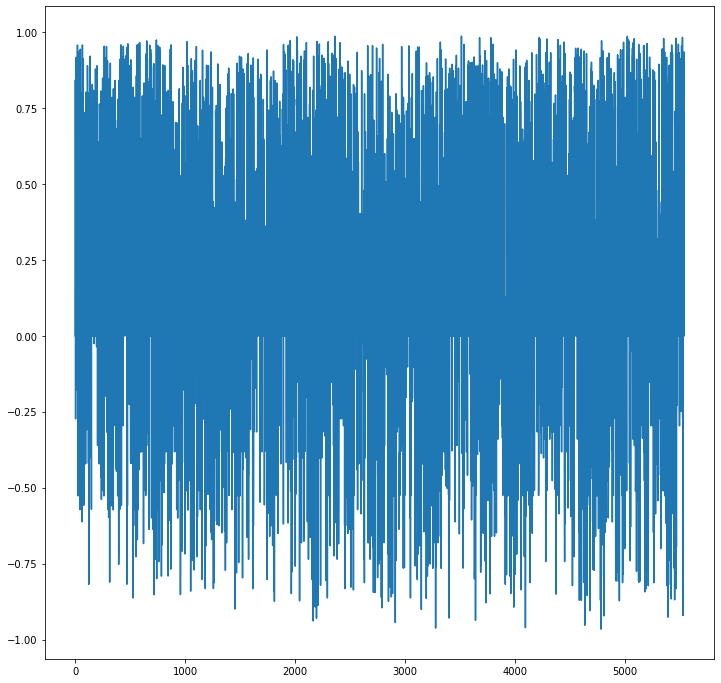

In [49]:
scores = [analyser.polarity_scores(sent)['compound'] for sent in text2_sentences]#[0::50]]
fig = plt.figure(figsize=(12,12))
plt.plot(scores)
plt.show()